In [1]:

# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

#inline visualization

%matplotlib inline

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
#Import Dataset
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [4]:
df = data.copy()

In [6]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [9]:
#Quater As a index
df1 = df.set_index('Quarter')

In [8]:
df1.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


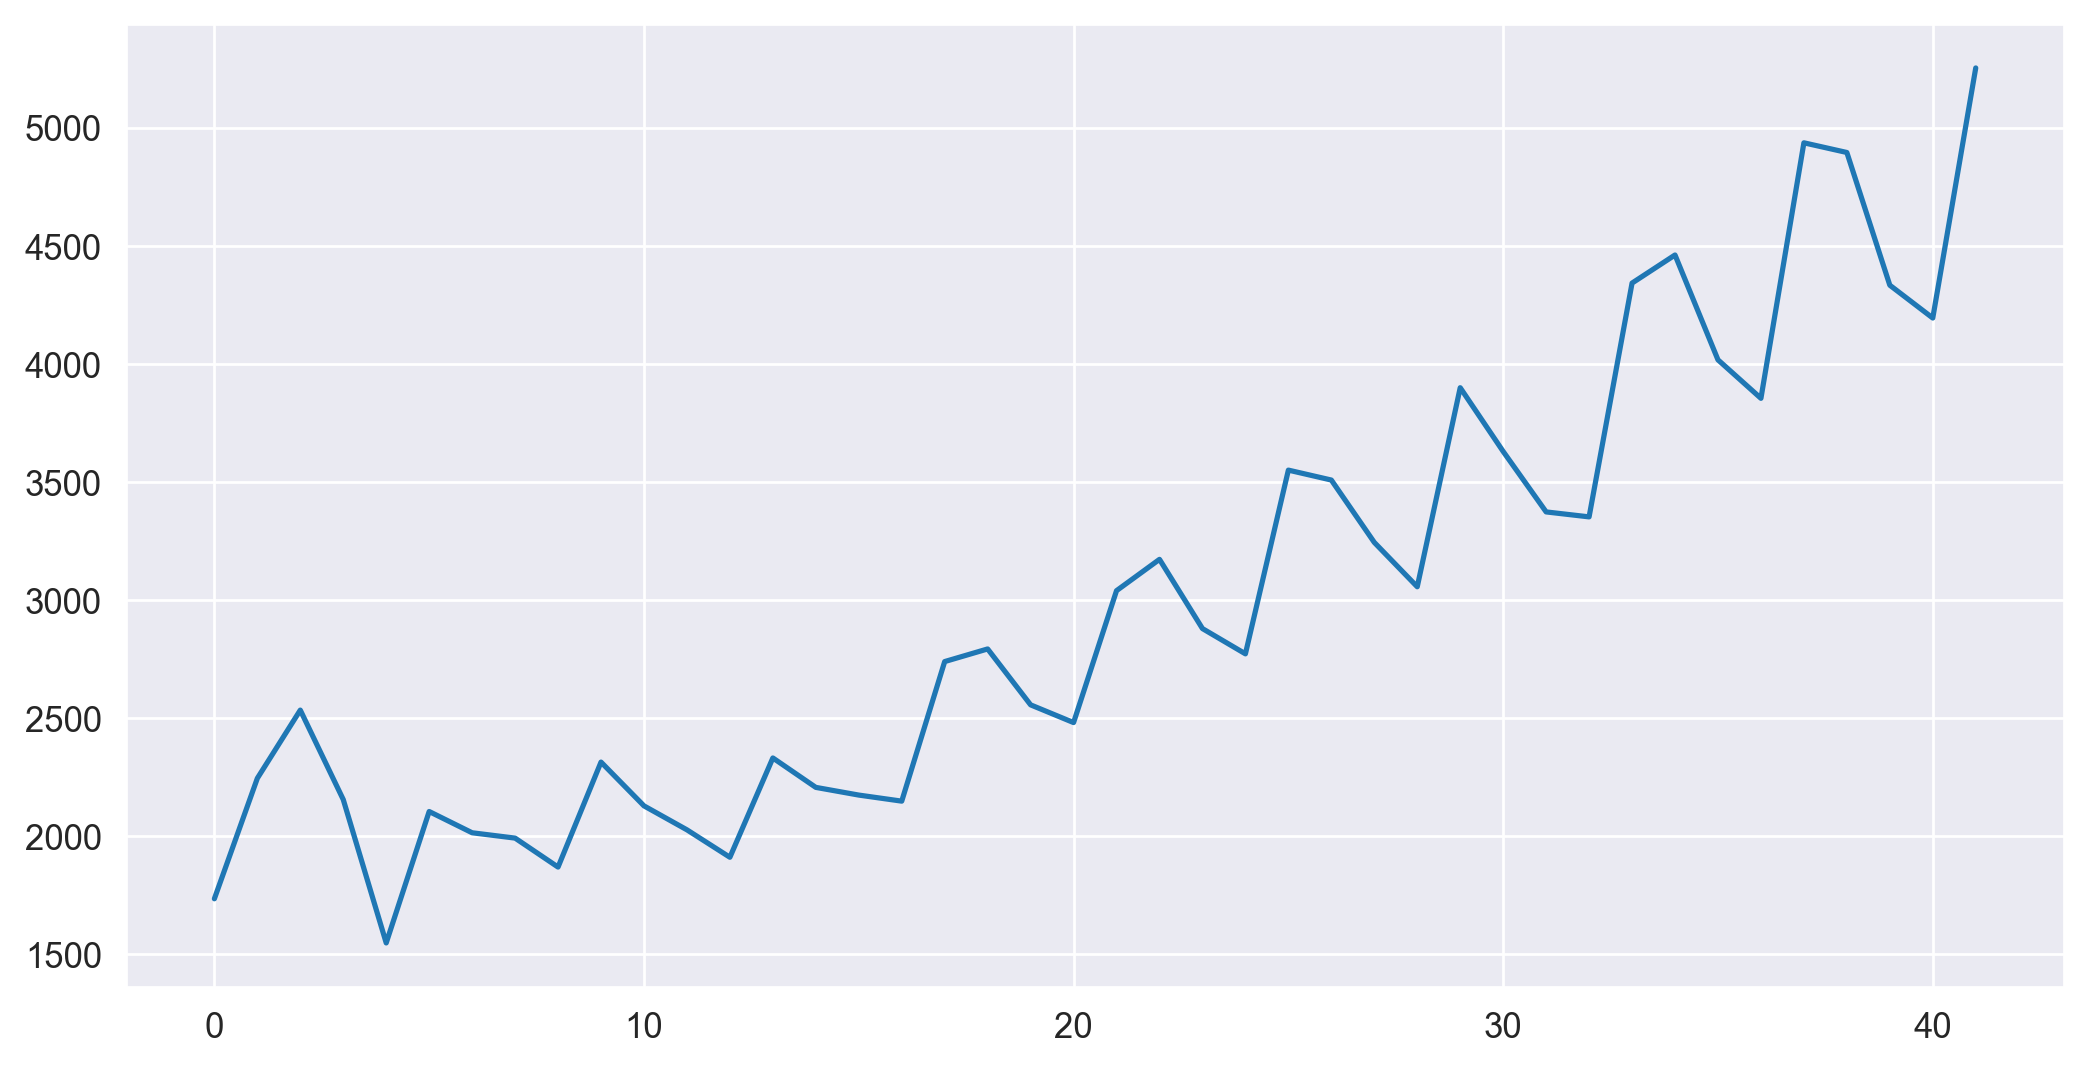

In [11]:
plt.plot(data['Sales'])

In [12]:
#First-order difference
data['First-Order'] = data['Sales'].diff(periods=1)
data

,Quarter,Sales,First-Order
0,Q1_86,1734.827000,NaN
1,Q2_86,2244.960999,510.133999
2,Q3_86,2533.804993,288.843994
3,Q4_86,2154.962997,-378.841995
4,Q1_87,1547.818996,-607.144001
5,Q2_87,2104.411995,556.592999
6,Q3_87,2014.362999,-90.048996
7,Q4_87,1991.746998,-22.616001
8,Q1_88,1869.049999,-122.696999
9,Q2_88,2313.631996,444.581997


In [13]:
# Drop na 

data.dropna(inplace=True)

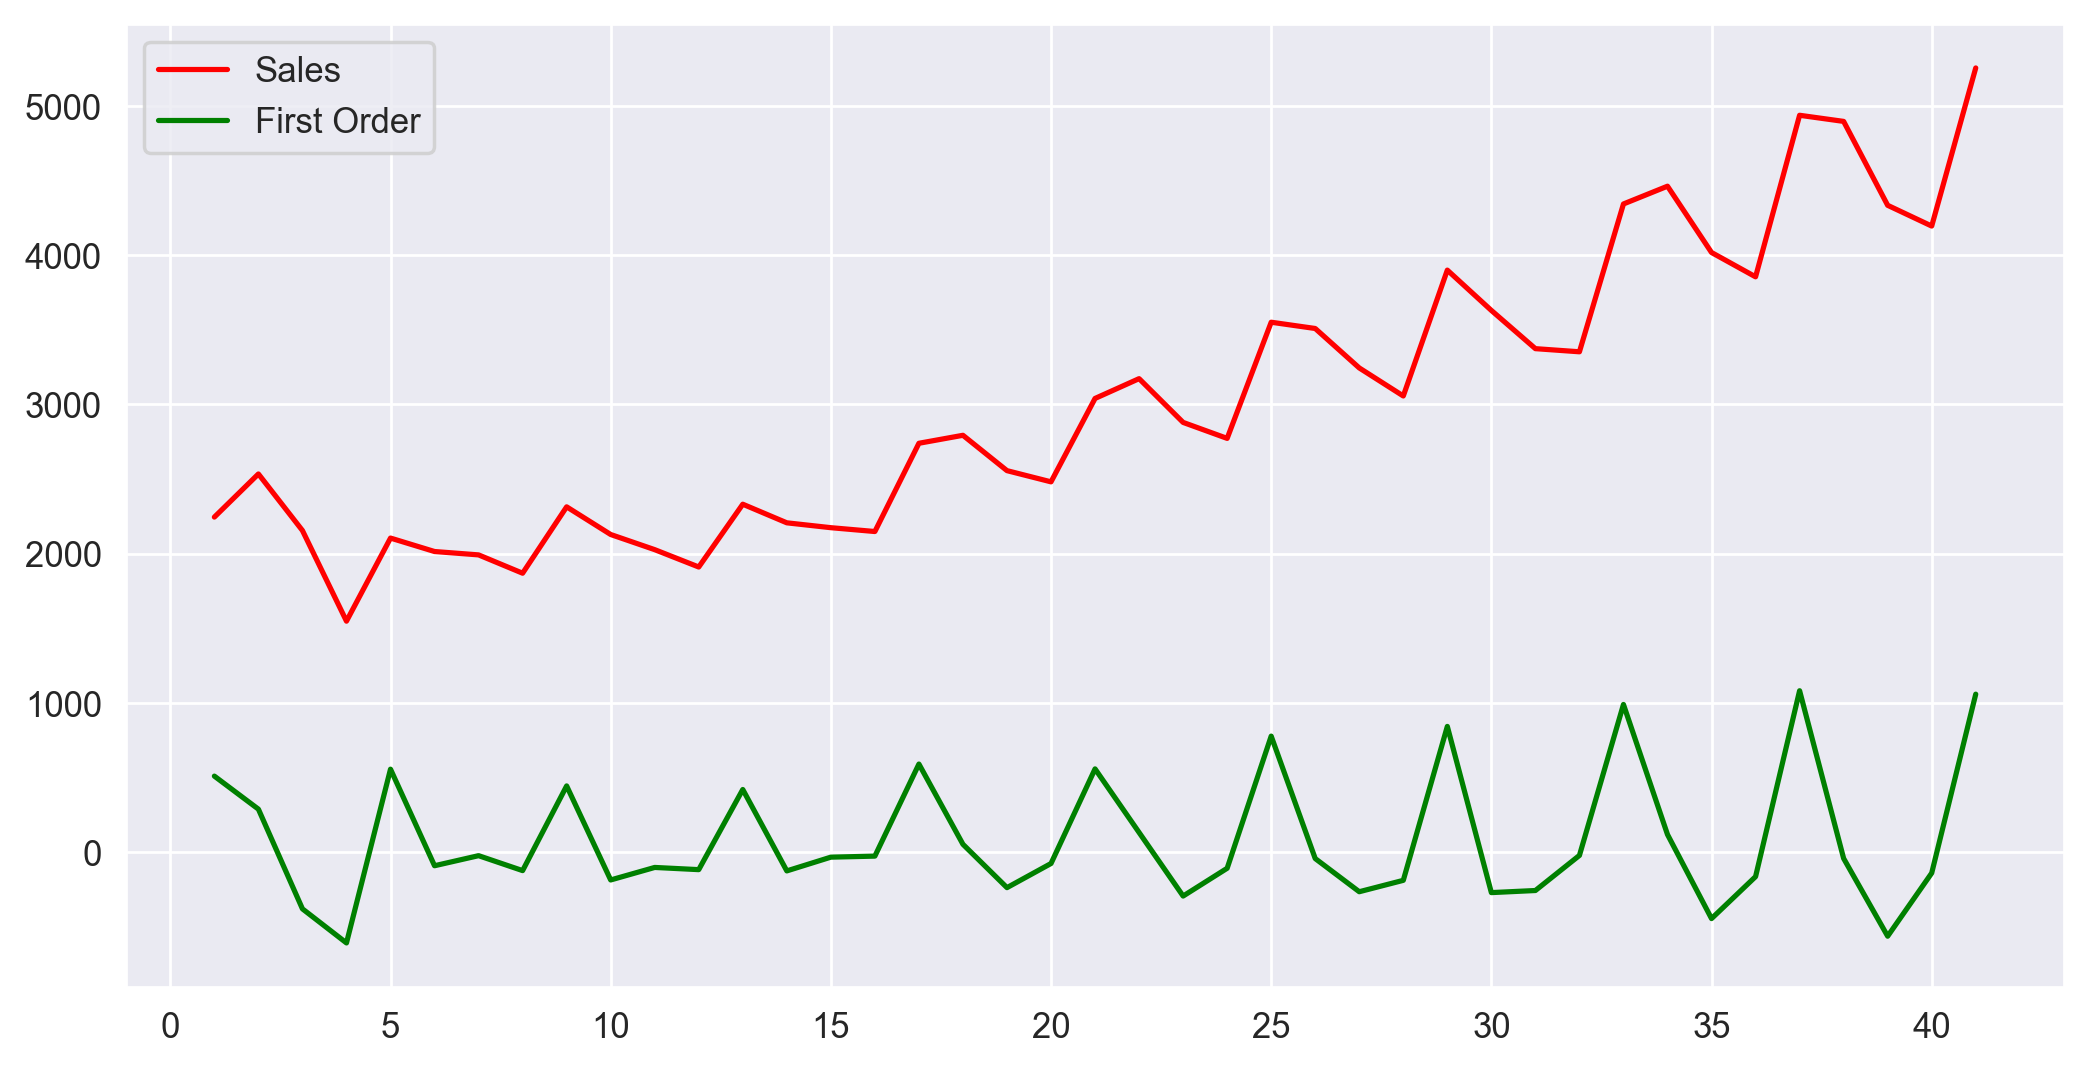

In [14]:
# Plot

plt.plot(data['Sales'], color = 'red', label = 'Sales')
plt.plot(data['First-Order'], color = 'green', label = 'First Order')
plt.legend()

In [15]:
#Calculate Autocorrelation

acf_values = acf(data['First-Order'])
acf_values

array([ 1.        , -0.12698142, -0.58248117, -0.14078903,  0.77149614,
       -0.14552797, -0.45200093, -0.08720848,  0.63989518, -0.10590553,
       -0.36920089, -0.09077286,  0.53661329, -0.13653501, -0.34381079,
       -0.04096384,  0.48023407])

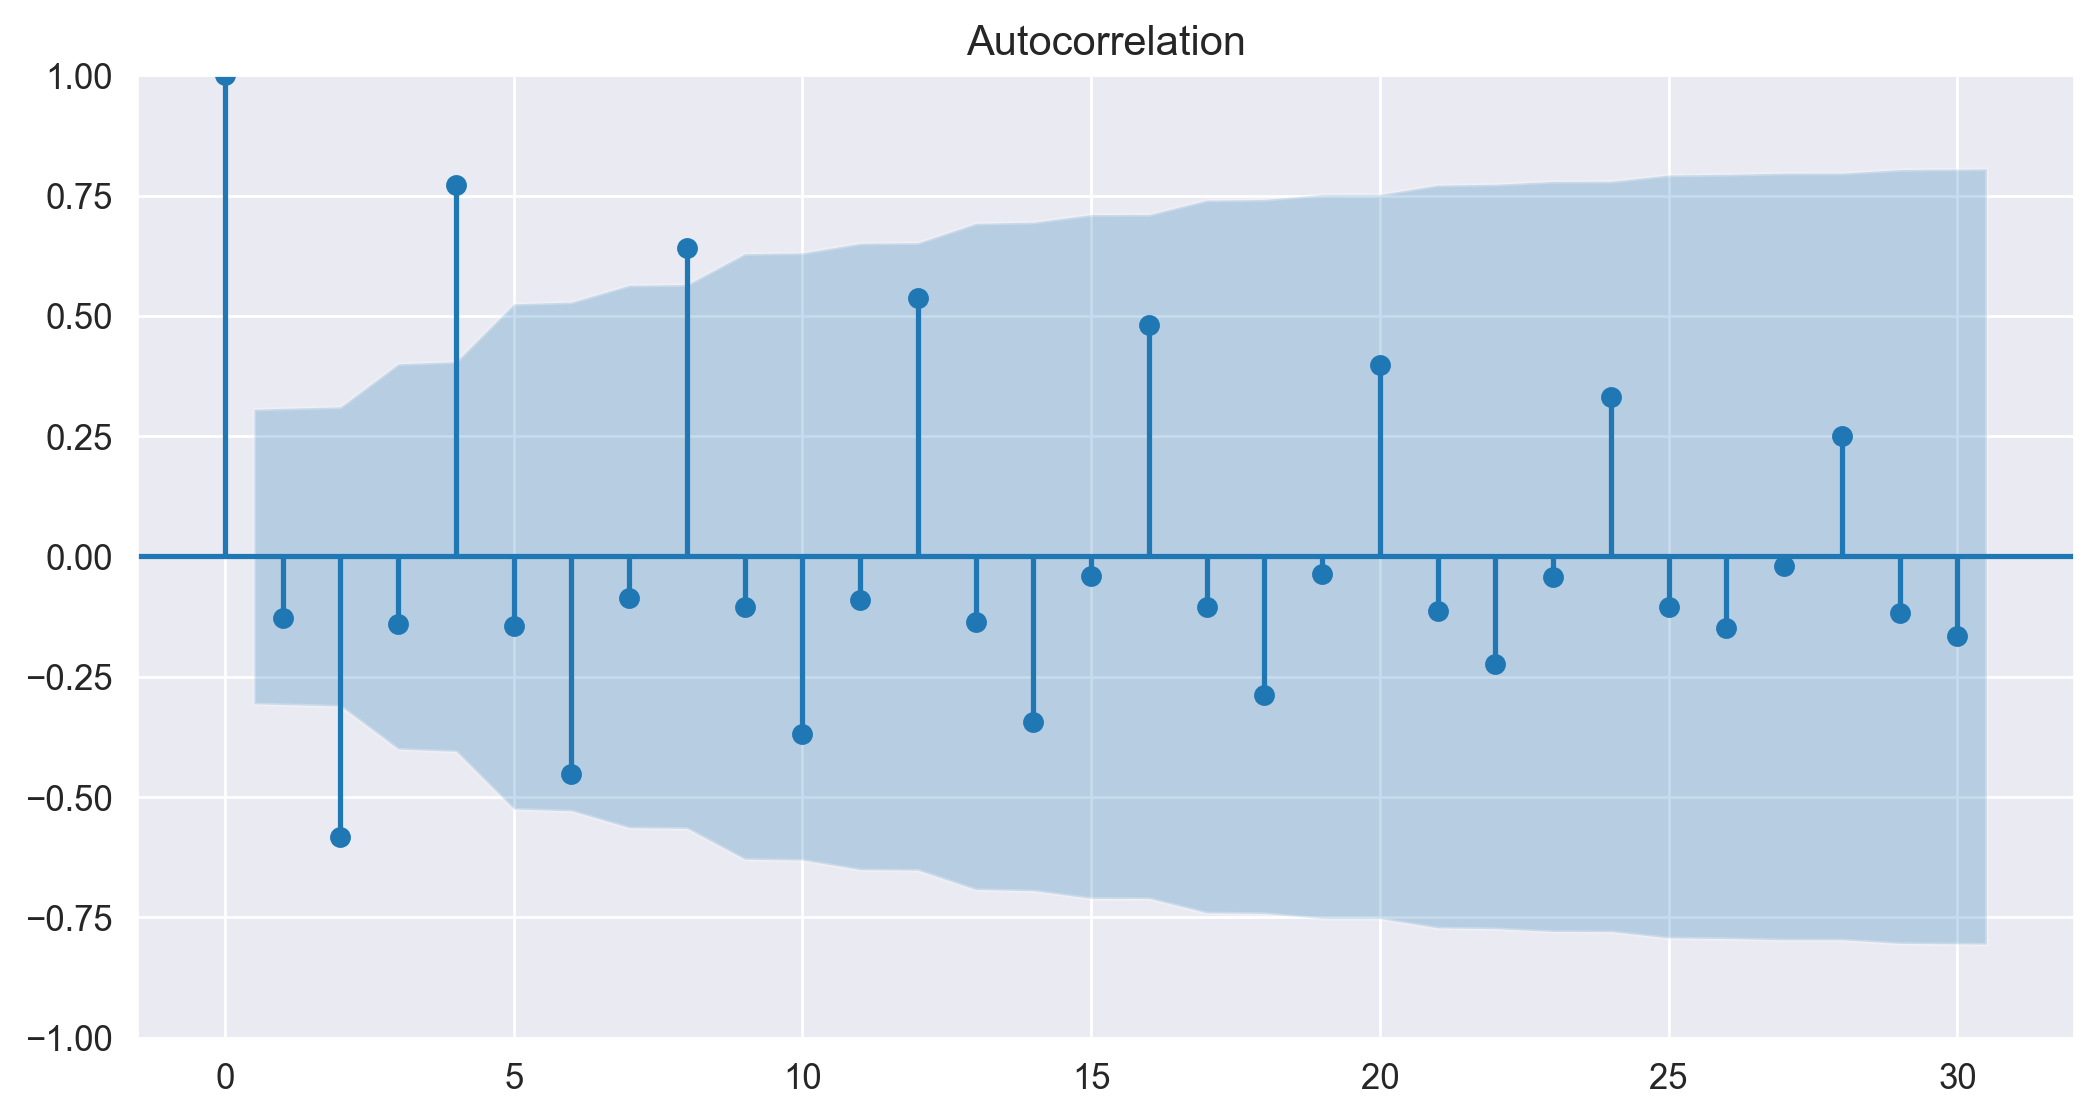

In [19]:
#Plot ACF

plot_acf(data['First-Order'], lags=30);

In [20]:
# Calculate PACF

pacf_val = pacf(data['First-Order'])
pacf_val

array([ 1.        , -0.13015595, -0.64013685, -0.6306896 ,  0.58559493,
       -0.39750543,  0.1046144 , -0.0772609 ,  0.18417045,  0.20544454,
       -0.00904403,  0.06302475,  0.30259239, -0.48114516, -0.13134357,
        0.0170421 , -0.28961627])

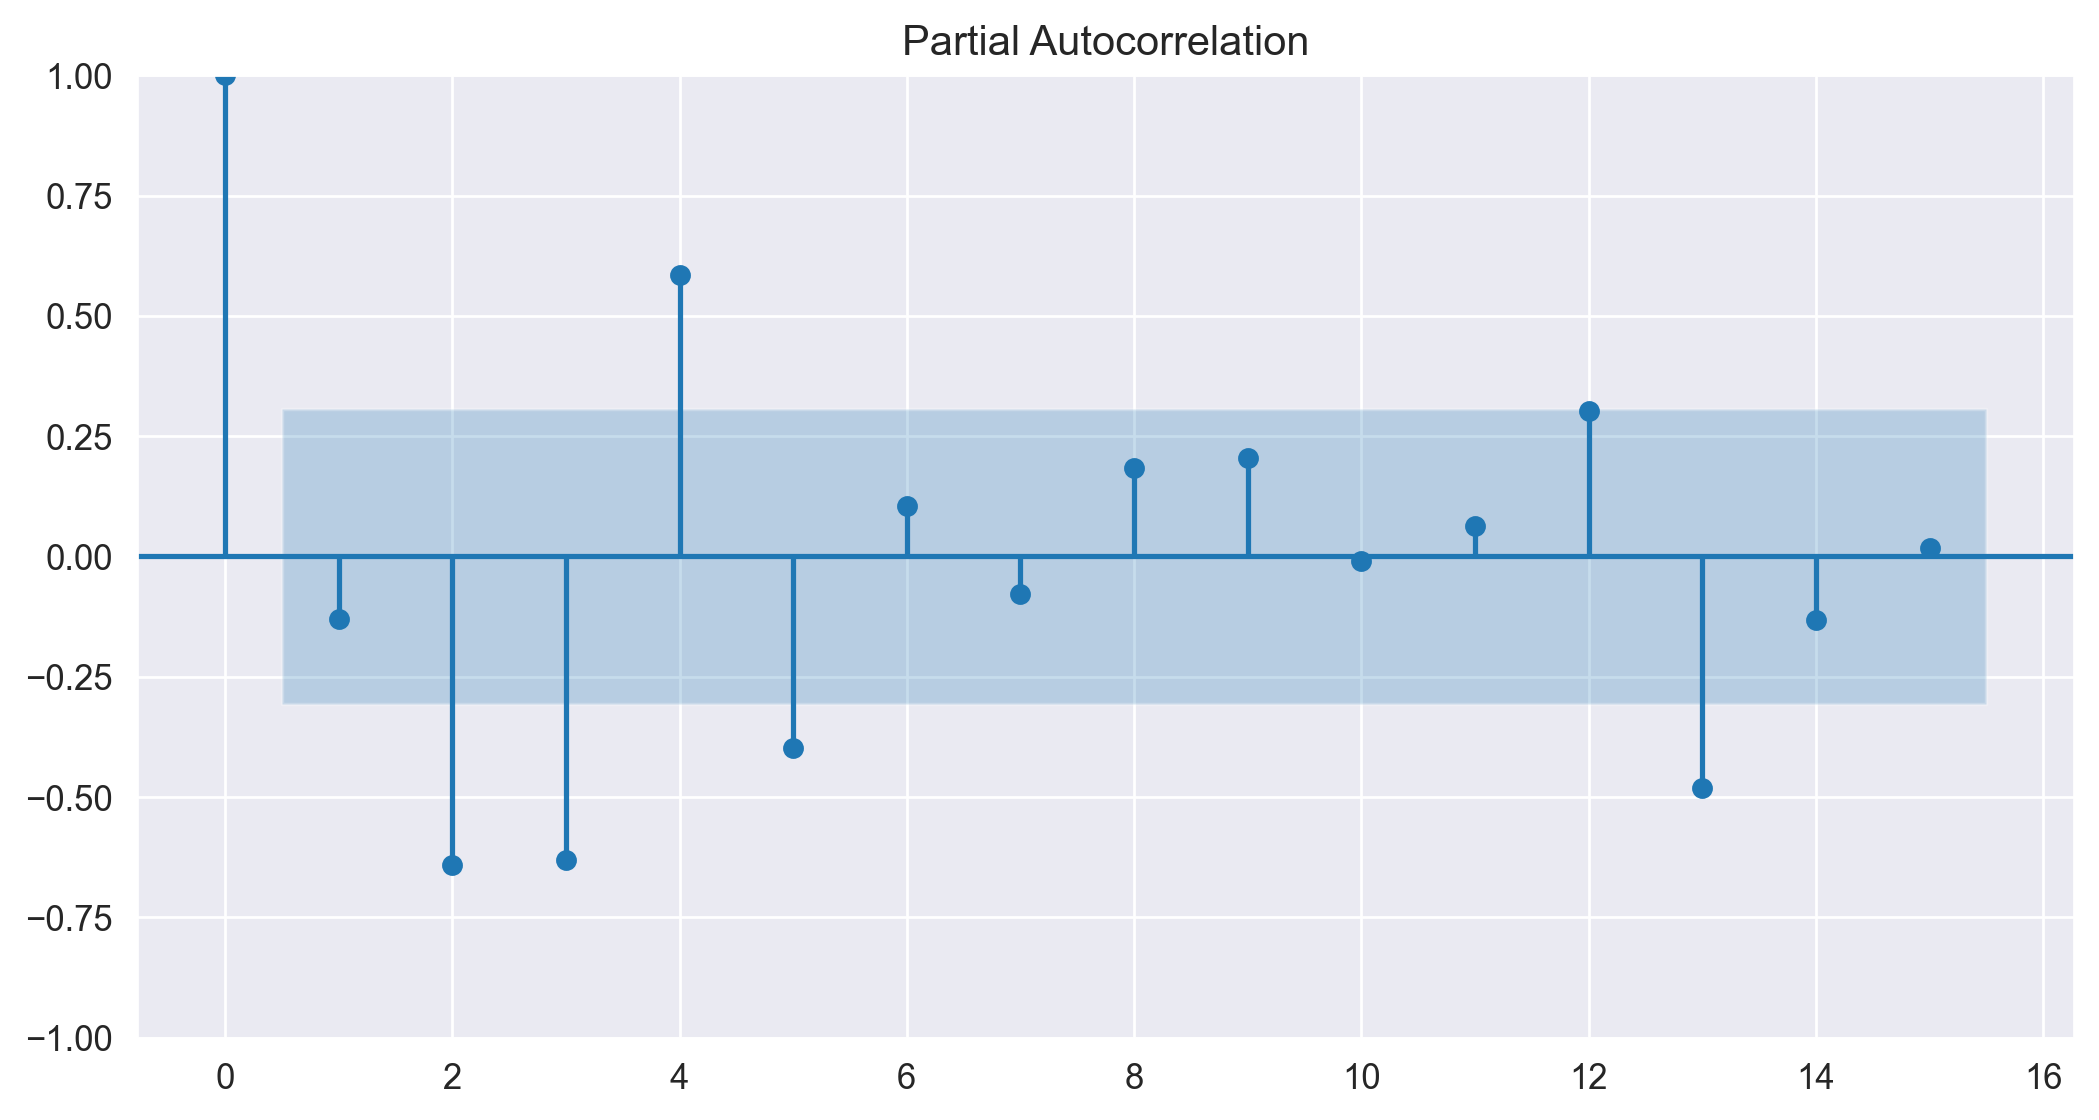

In [22]:
# Plot PACF

plot_pacf(data['First-Order'], lags=15);


In [23]:
# Square root Transformation

from numpy import sqrt
from pandas import DataFrame

dataframe = DataFrame(df1.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

In [31]:
df1["t"] = np.arange(0,42)

df1["t_sq"] = df1["t"]

df1["log_Sales"] = np.log(df1["Sales"])
df1

,Sales,t,t_sq,log_Sales
Quarter,,,,
Q1_86,1734.827000,0,0,7.458663
Q2_86,2244.960999,1,1,7.716443
Q3_86,2533.804993,2,2,7.837477
Q4_86,2154.962997,3,3,7.675529
Q1_87,1547.818996,4,4,7.344602
Q2_87,2104.411995,5,5,7.651791
Q3_87,2014.362999,6,6,7.608058
Q4_87,1991.746998,7,7,7.596767
Q1_88,1869.049999,8,8,7.533186


In [32]:
#Train data

Train = df1.head(77)

#Test data 

Test = df1.tail(19)

In [33]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

409.00597384851807

In [34]:
# Exponential Model

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

378.548508248277

In [36]:
# Quadratic Model

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

409.00597384851795

In [37]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,378.548508
2,rmse_Quad,409.005974
0,rmse_linear,409.005974


# Moving average

<Axes: >

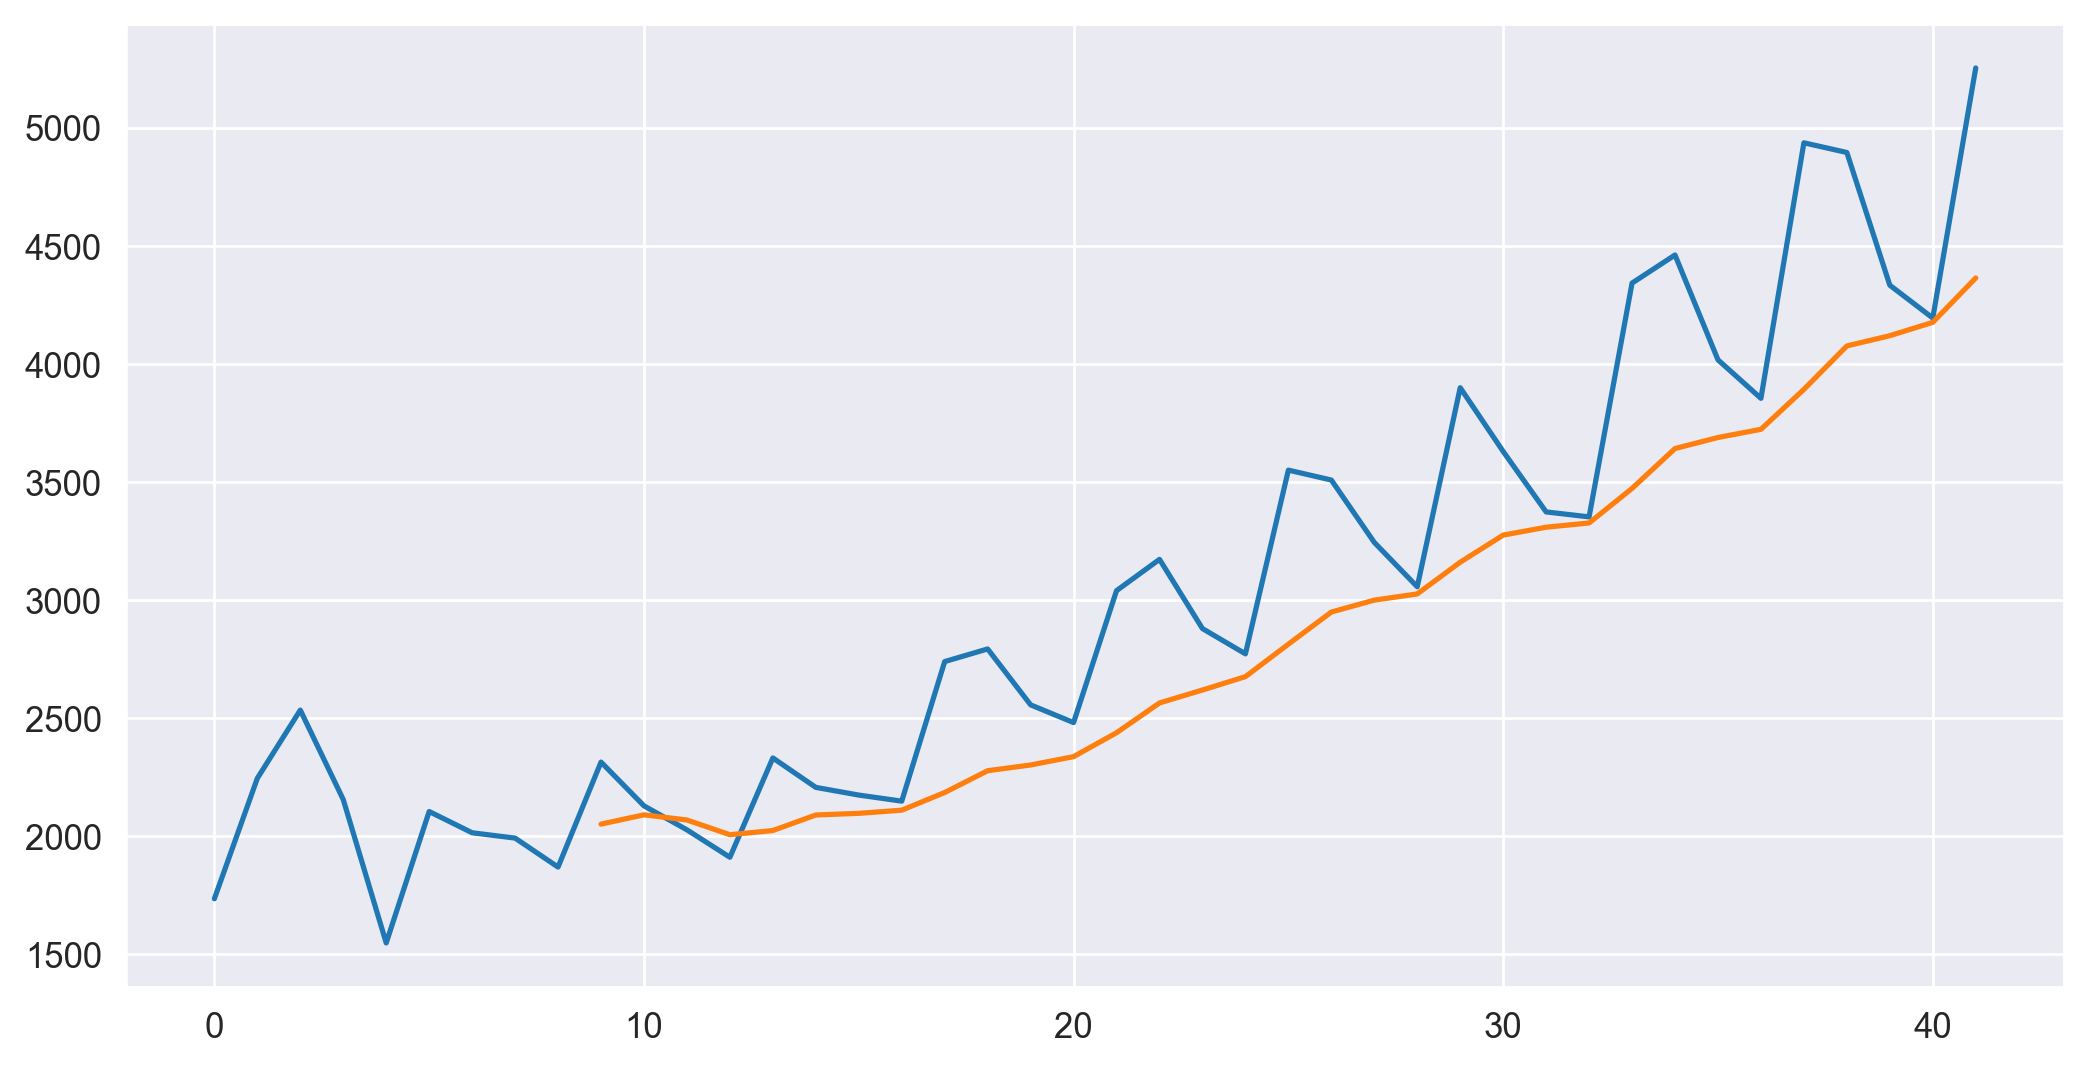

In [40]:
df['Sales'].plot()
df['Sales'].rolling(10).mean().plot()

In [41]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Check stationarity of the data

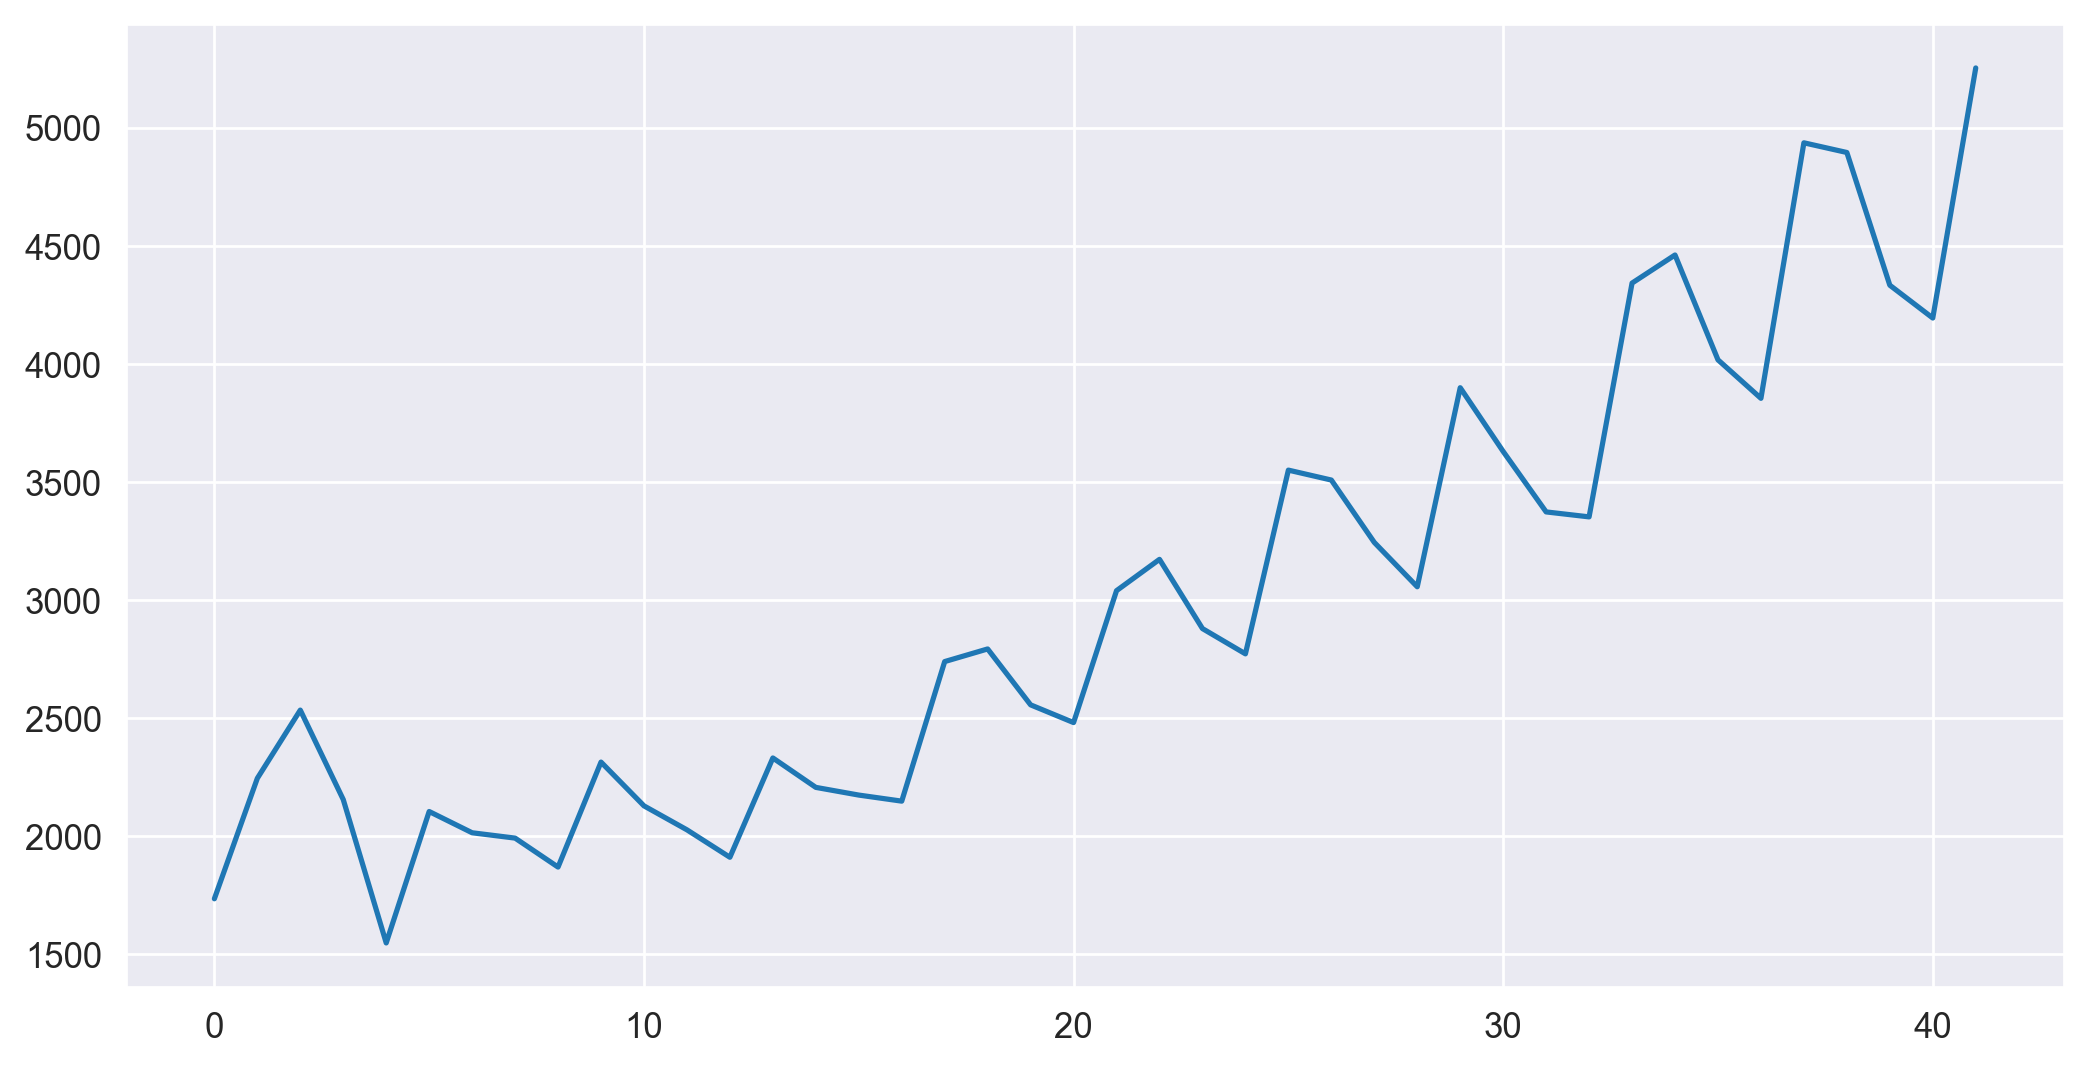

In [42]:
plt.plot(df['Sales'])

In [45]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.309421
p-value                         0.996661
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


*If p< 0.05 ; Data is stationary

*if p>0.05; Data is not stationary

According the p-value, the dataset is non-stationary as the p value is greater than alpha value.So, we can't build ARIMA Model.